# Mean Reversion -  Pairs Trading
- Long Pair: Long stock A and short stock B,
- Short Pair: Short stock A and long stock B,
- If a relationship is found suggesting that the prices move in opposite directions, you can long/short the pair since as it can be expected that due to the correlation the pair will converge back to its original form.


## Strategy 
1) Find 2 assets that move similarly with eachother either a negative or positive correlation
2) Sell the 'overvalued' stock and buy the 'undervalued' 
3) If the ratio changes significantly, then you know it is time to trade. 'Significance' can be measured with standard deviation.

In [1]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [1]:
import re
from io import StringIO
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [2]:
# Getting Data from 6 years back
# adjusted close as the main data.
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE","FEYE", "FB","BRK-B", "MSFT"]
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FEYE: No dat

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FEYE,FB,BRK-B,MSFT
Date,,,,,,,,,,,,,,,,,
2021-10-20,455.155334,148.428253,142.414993,116.389999,46.130001,447.496887,625.140015,216.169998,143.703766,65.800003,397.911652,61.087143,156.964767,NaN,NaN,287.489990,304.856812
2021-10-21,464.465271,148.647034,142.780502,119.330002,45.427502,448.664062,653.159973,214.339996,144.501022,65.400002,397.618958,59.977333,160.659805,NaN,NaN,286.820007,308.178986
2021-10-22,460.862366,147.861450,138.625000,119.820000,42.450001,448.199158,664.780029,212.970001,146.006958,62.240002,404.184326,60.388725,161.947617,NaN,NaN,289.239990,306.592285
2021-10-25,462.758148,147.811722,138.772995,122.360001,43.492500,450.602783,671.659973,212.869995,147.699905,62.110001,404.603790,61.565502,162.680695,NaN,NaN,290.260010,305.570801
2021-10-26,462.301544,148.487946,139.671997,122.930000,44.459999,451.008331,668.520020,209.809998,146.410522,61.430000,407.393829,62.991024,162.254715,NaN,NaN,290.850006,307.534363


In [3]:
#Computing the pairwise correlation of Companies 
corr_matrix = d.corr()
corr_matrix

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,FEYE,FB,BRK-B,MSFT
DPZ,1.000000,0.818148,0.874797,0.665388,0.469130,0.834557,0.372663,0.080836,0.407599,0.336258,0.724772,0.497005,0.812071,NaN,NaN,0.715105,0.872942
AAPL,0.818148,1.000000,0.817185,0.788684,0.430274,0.832325,0.659198,0.095350,0.373090,0.490575,0.729216,0.498231,0.862453,NaN,NaN,0.608197,0.886737
GOOG,0.874797,0.817185,1.000000,0.572945,0.717871,0.978253,0.542024,0.332867,0.120376,0.604391,0.933673,0.794650,0.729426,NaN,NaN,0.901955,0.974893
AMD,0.665388,0.788684,0.572945,1.000000,0.076881,0.555607,0.697511,-0.128145,0.555588,0.219452,0.447324,0.182714,0.814615,NaN,NaN,0.288319,0.681377
GME,0.469130,0.430274,0.717871,0.076881,1.000000,0.737520,0.240664,0.562551,-0.303936,0.553100,0.803210,0.823951,0.303382,NaN,NaN,0.800656,0.647865
SPY,0.834557,0.832325,0.978253,0.555607,0.737520,1.000000,0.532301,0.442483,0.118445,0.630425,0.964367,0.844584,0.731238,NaN,NaN,0.932636,0.955292
NFLX,0.372663,0.659198,0.542024,0.697511,0.240664,0.532301,1.000000,-0.031222,0.105738,0.386304,0.480084,0.369577,0.502257,NaN,NaN,0.301593,0.651469
BA,0.080836,0.095350,0.332867,-0.128145,0.562551,0.442483,-0.031222,1.000000,-0.313237,0.534617,0.510482,0.671750,0.079400,NaN,NaN,0.568068,0.229572
WMT,0.407599,0.373090,0.120376,0.555588,-0.303936,0.118445,0.105738,-0.313237,1.000000,-0.395426,-0.044592,-0.326004,0.399259,NaN,NaN,-0.007303,0.187105
TWTR,0.336258,0.490575,0.604391,0.219452,0.553100,0.630425,0.386304,0.534617,-0.395426,1.000000,0.666863,0.704388,0.464563,NaN,NaN,0.564449,0.600566


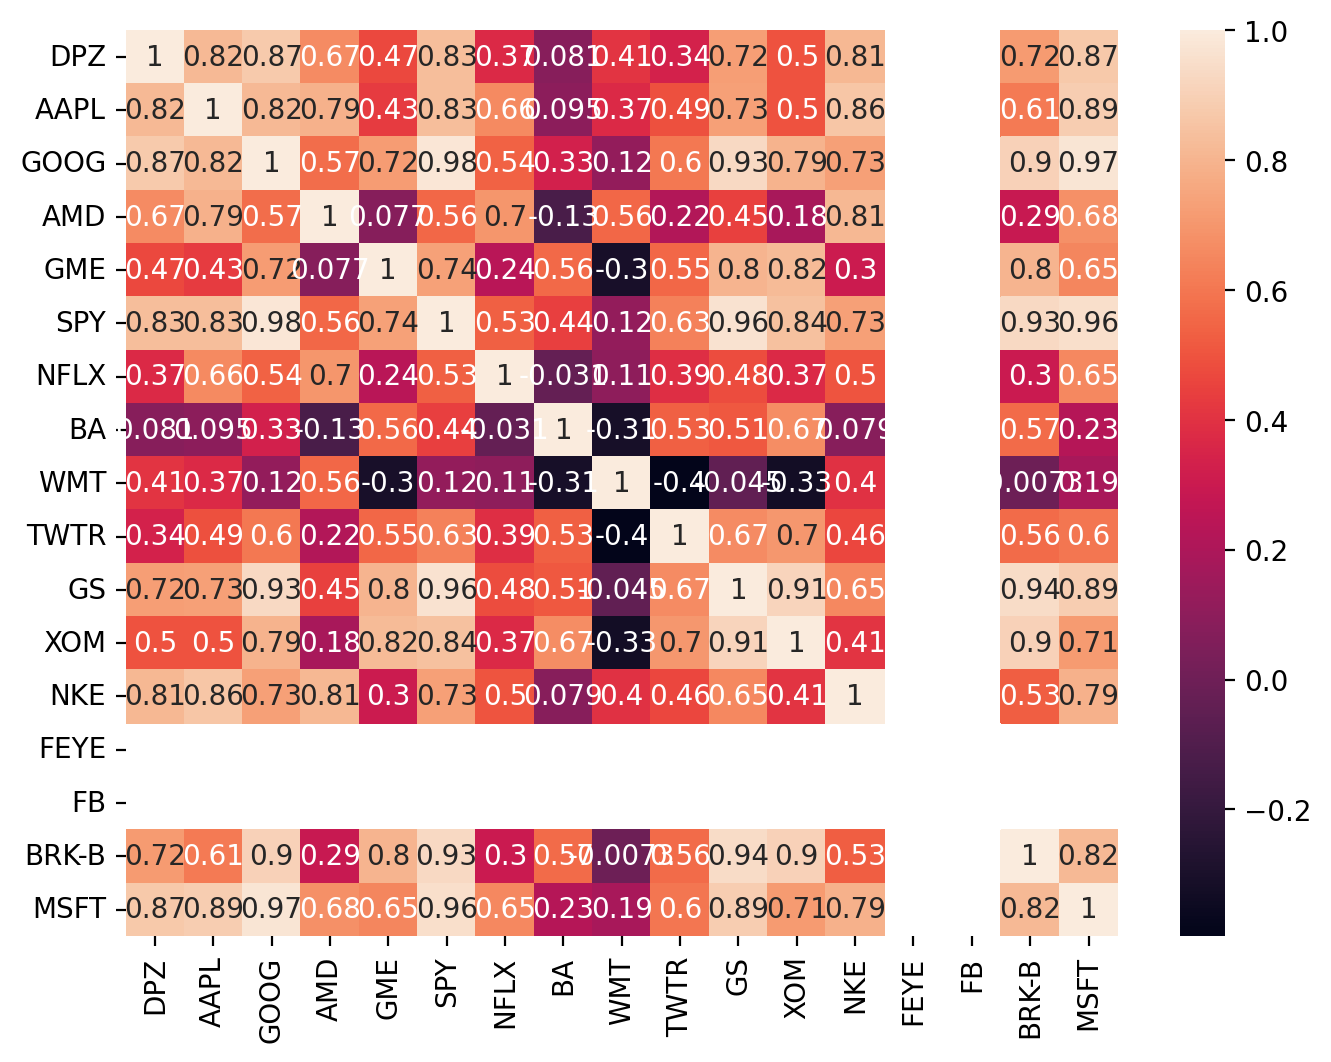

In [4]:
# heatmap matrix of corelation
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

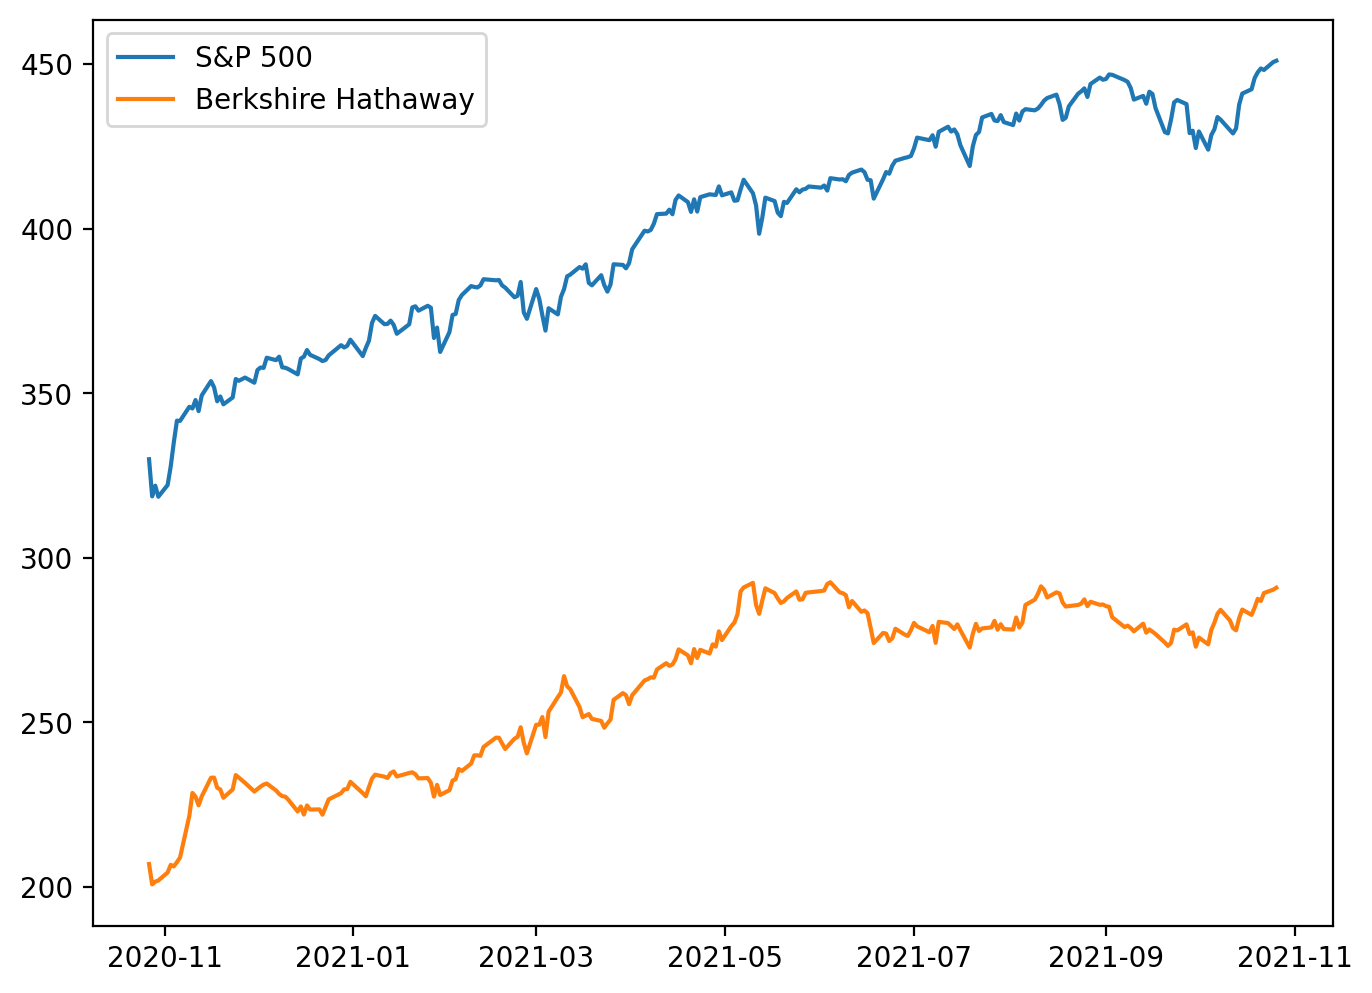

In [5]:
# check out the relationship between the stocks
# correlation is very high because the data is not standardized
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
SPY = d['SPY'] # S&P 500
BRK_A = d['BRK-B'] # Berkshire Class A share
plt.plot(SPY, label = "S&P 500")
plt.plot(BRK_A, label = "Berkshire Hathaway")
plt.legend()


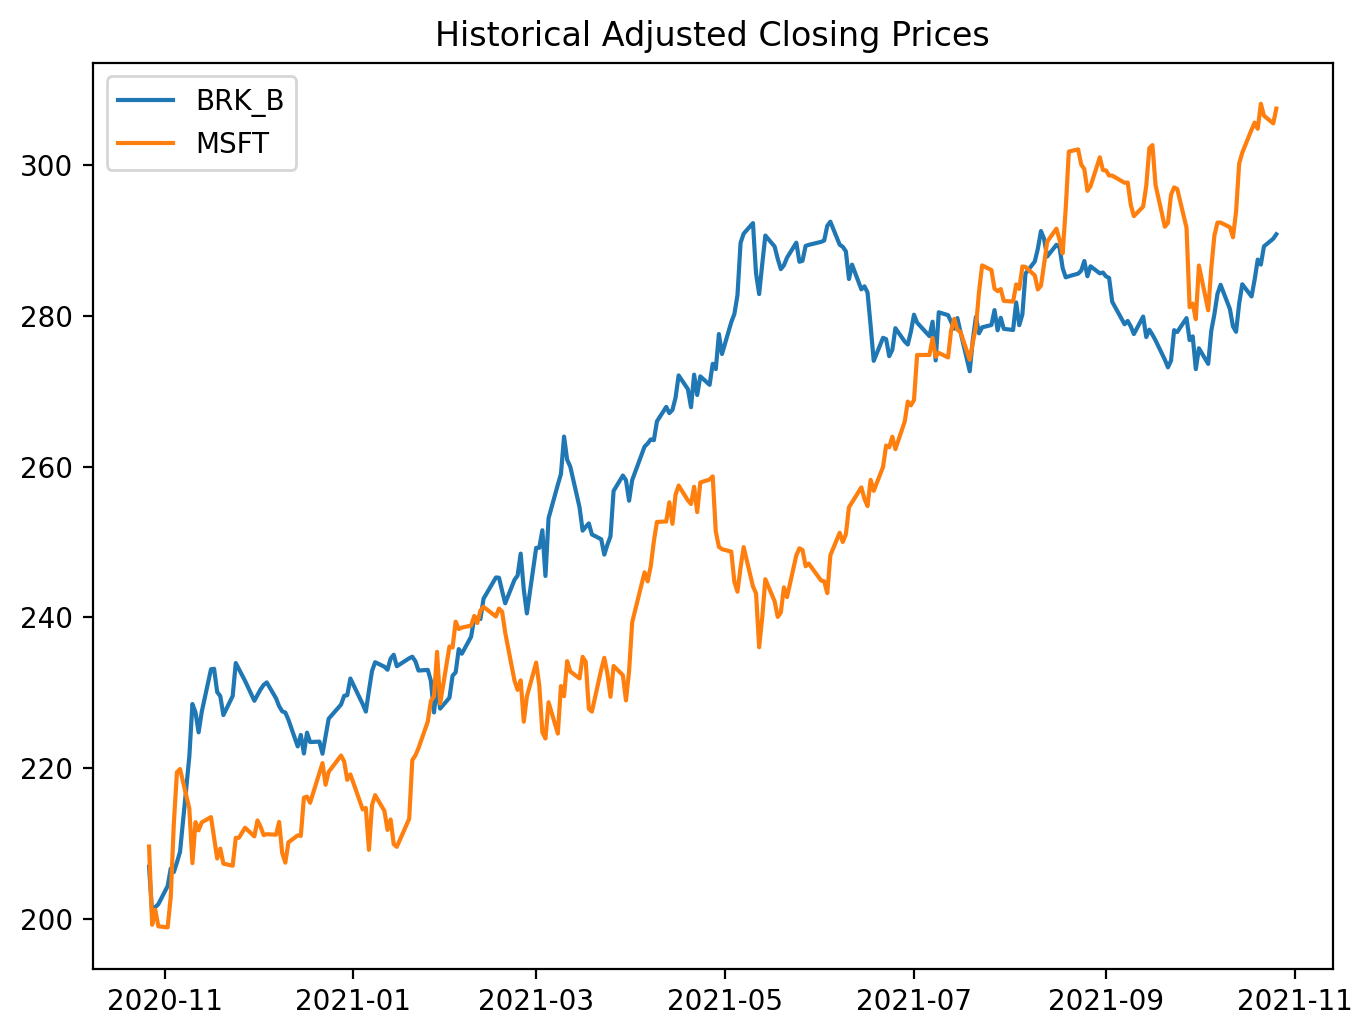

In [6]:
# More reasonable pair
figure(figsize=(8, 6), dpi=200)
BRK_B = d['BRK-B']
MSFT = d['MSFT']
plt.plot(BRK_B, label = "BRK_B")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Text(0.5, 1.0, 'Spread between NIKE and AAPL')

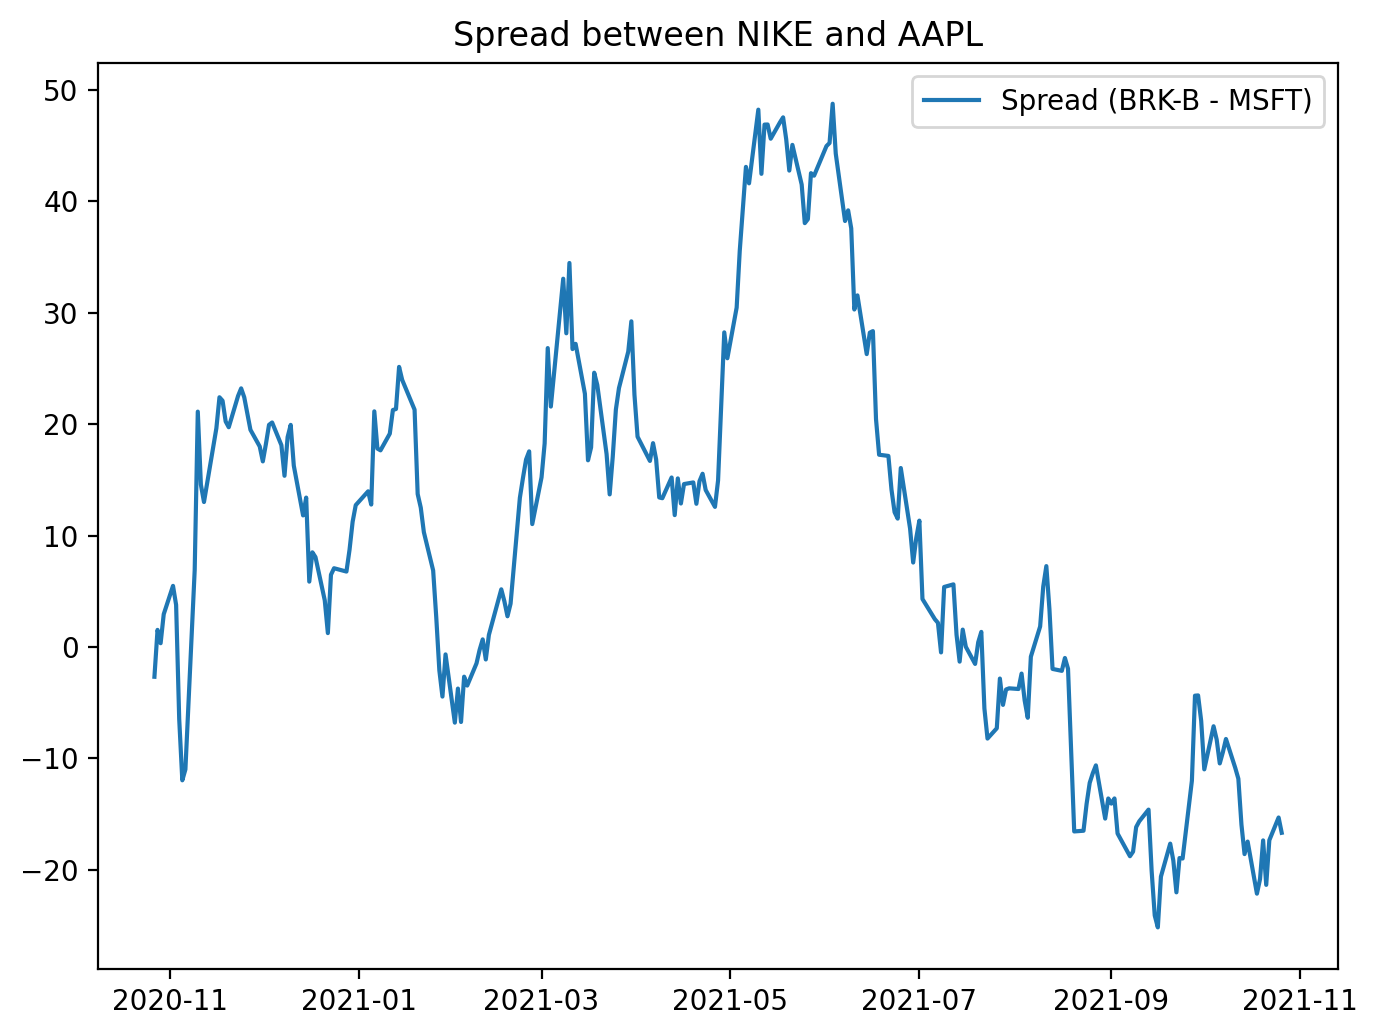

In [7]:
# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(BRK_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between NIKE and AAPL")

In [8]:
# Check out the cointegration value: Null hyp. = no cointegration
import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)

In [9]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.4266678121639087


In [10]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want stationary data else the data will be hard to predict.
# ADF for Berkshire Hathaway Class B
BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.3736745954764997
P value for the Augmented Dickey-Fuller Test is 0.9132530468763165
P value for the Augmented Dickey-Fuller Test is 0.5579983625114586
P value for the Augmented Dickey-Fuller Test is 0.444016714274561


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

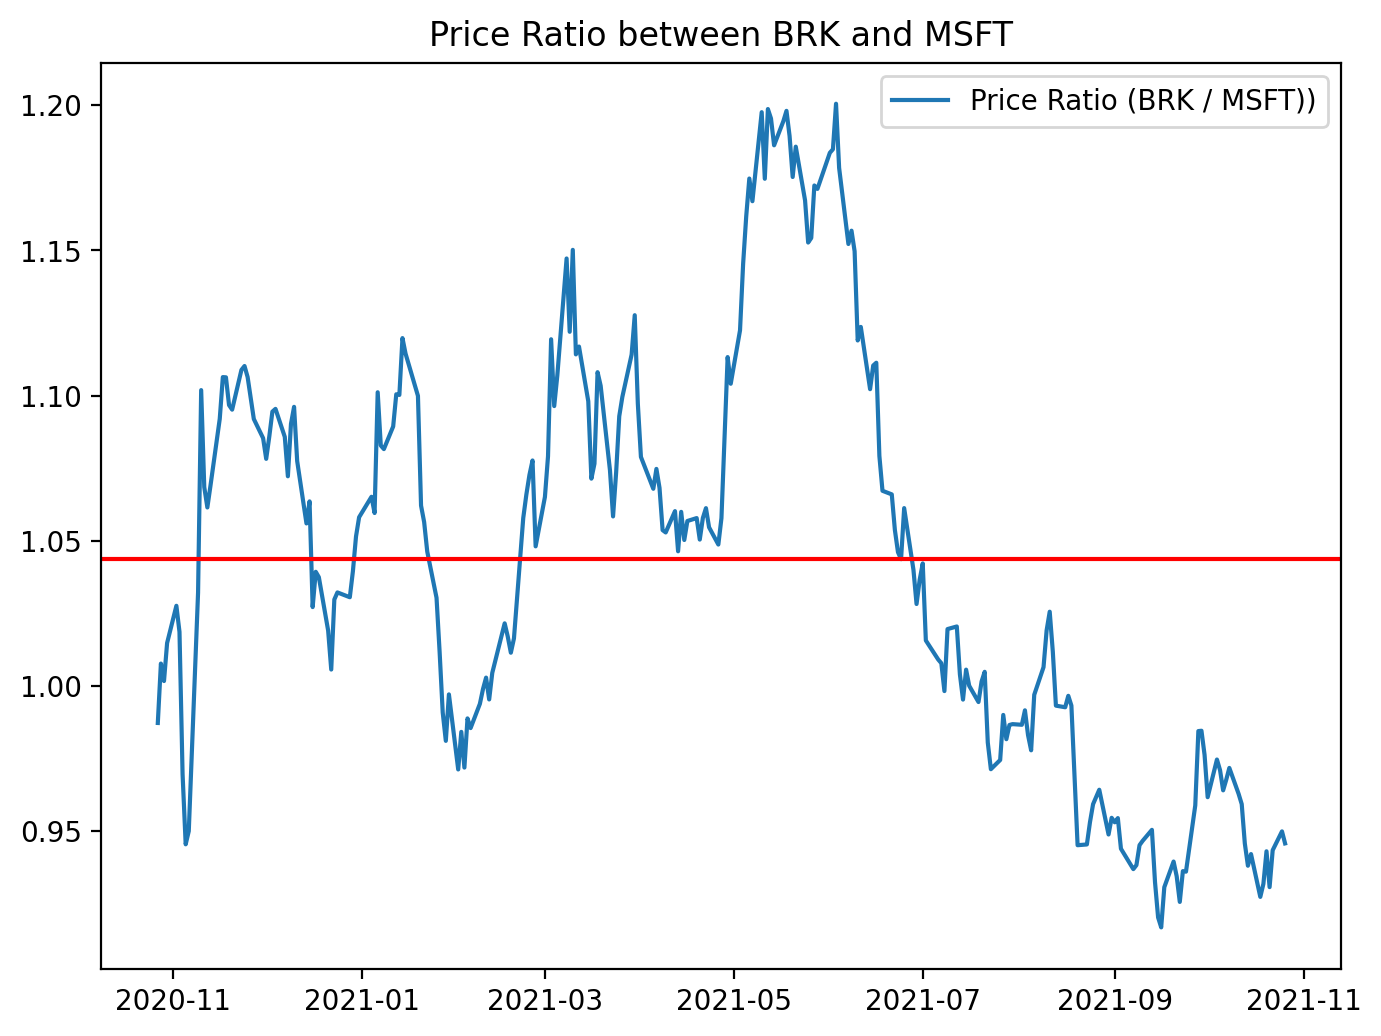

In [11]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

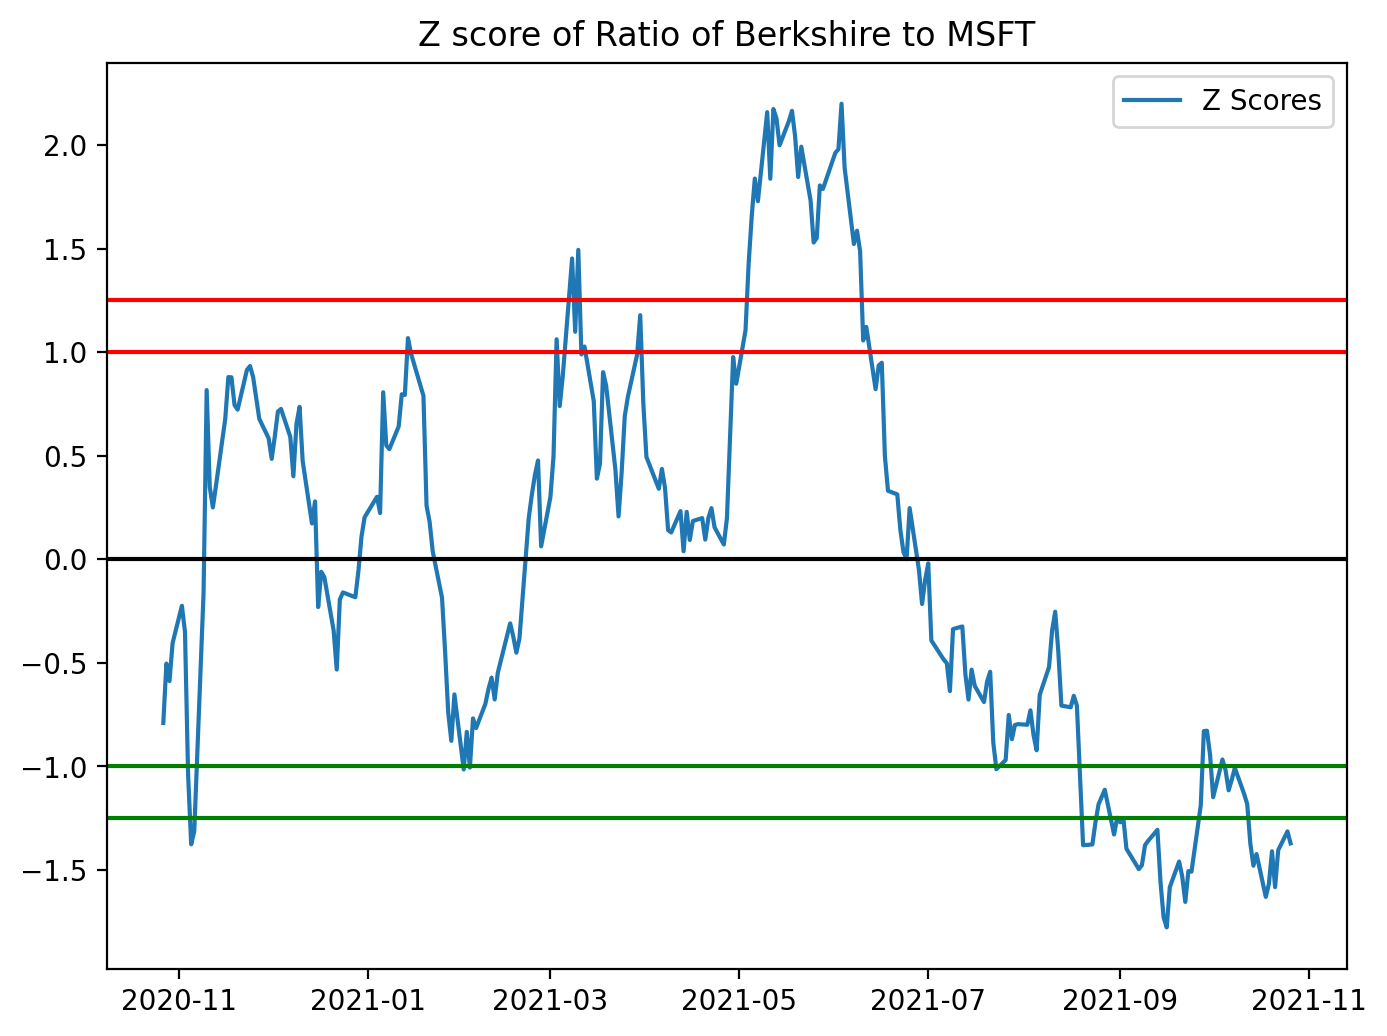

In [12]:
# standardizing the ratio to get a upper and lower bound to help evaluate the trends
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of the data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of the data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of the data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

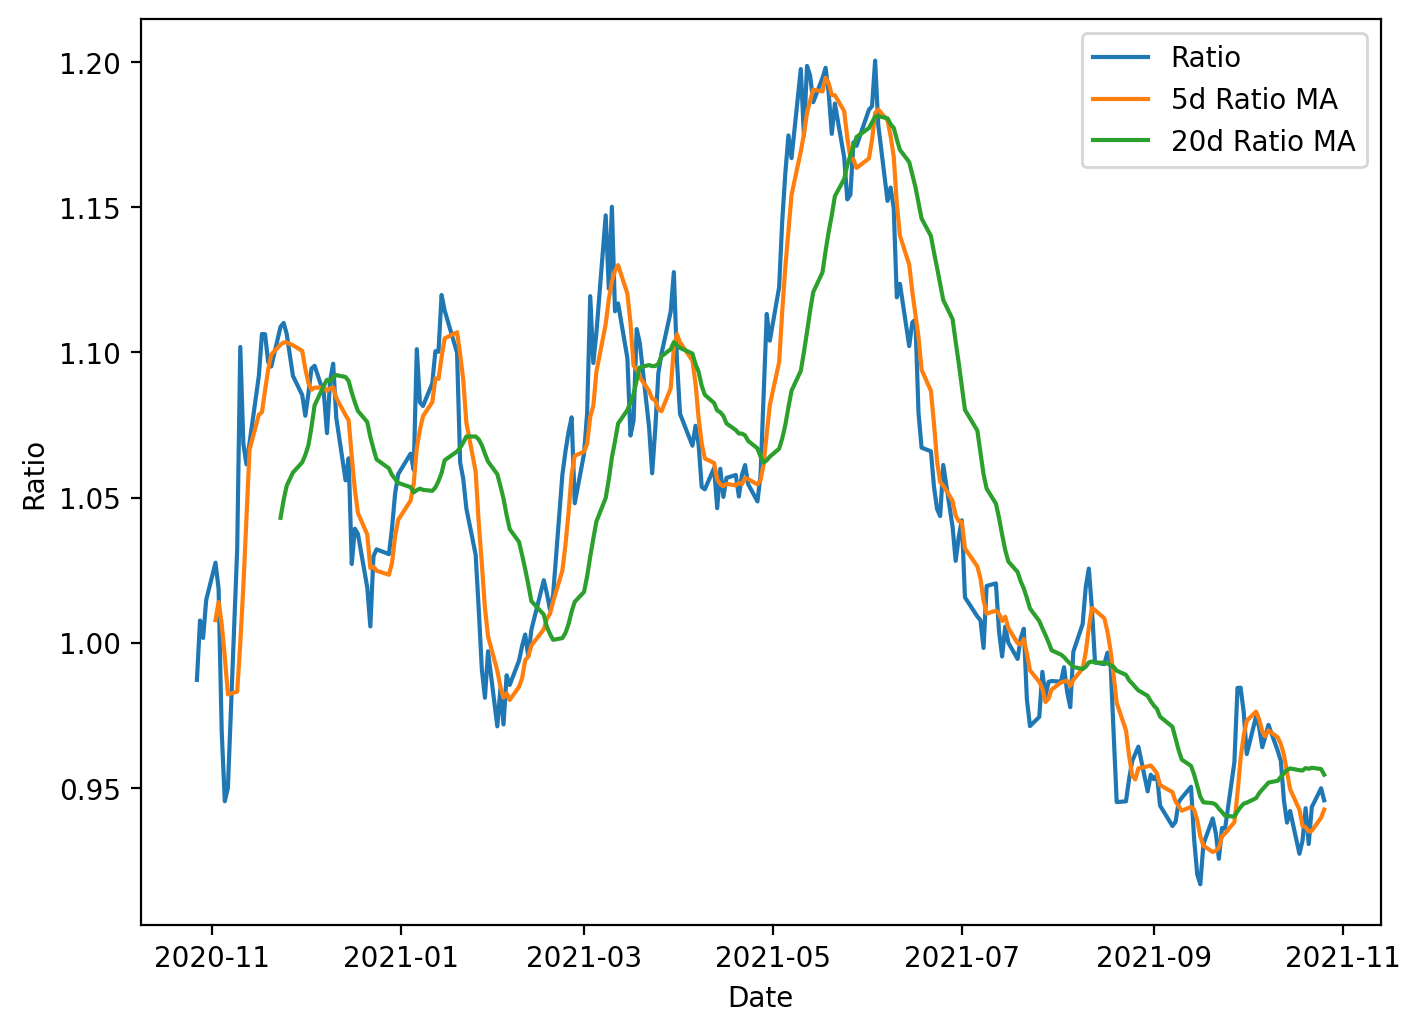

In [13]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()

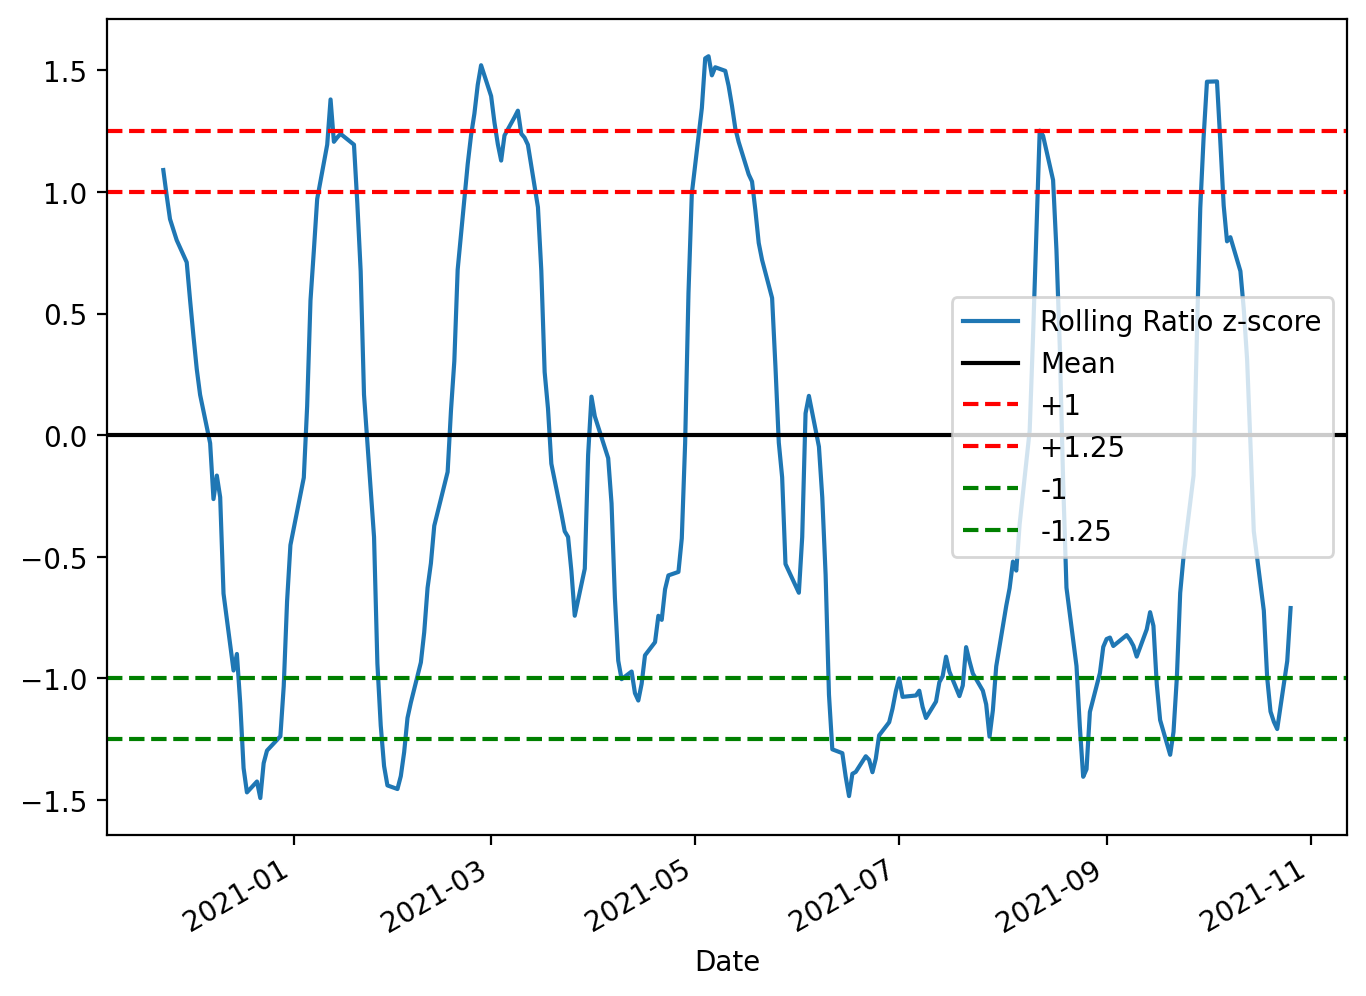

In [14]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

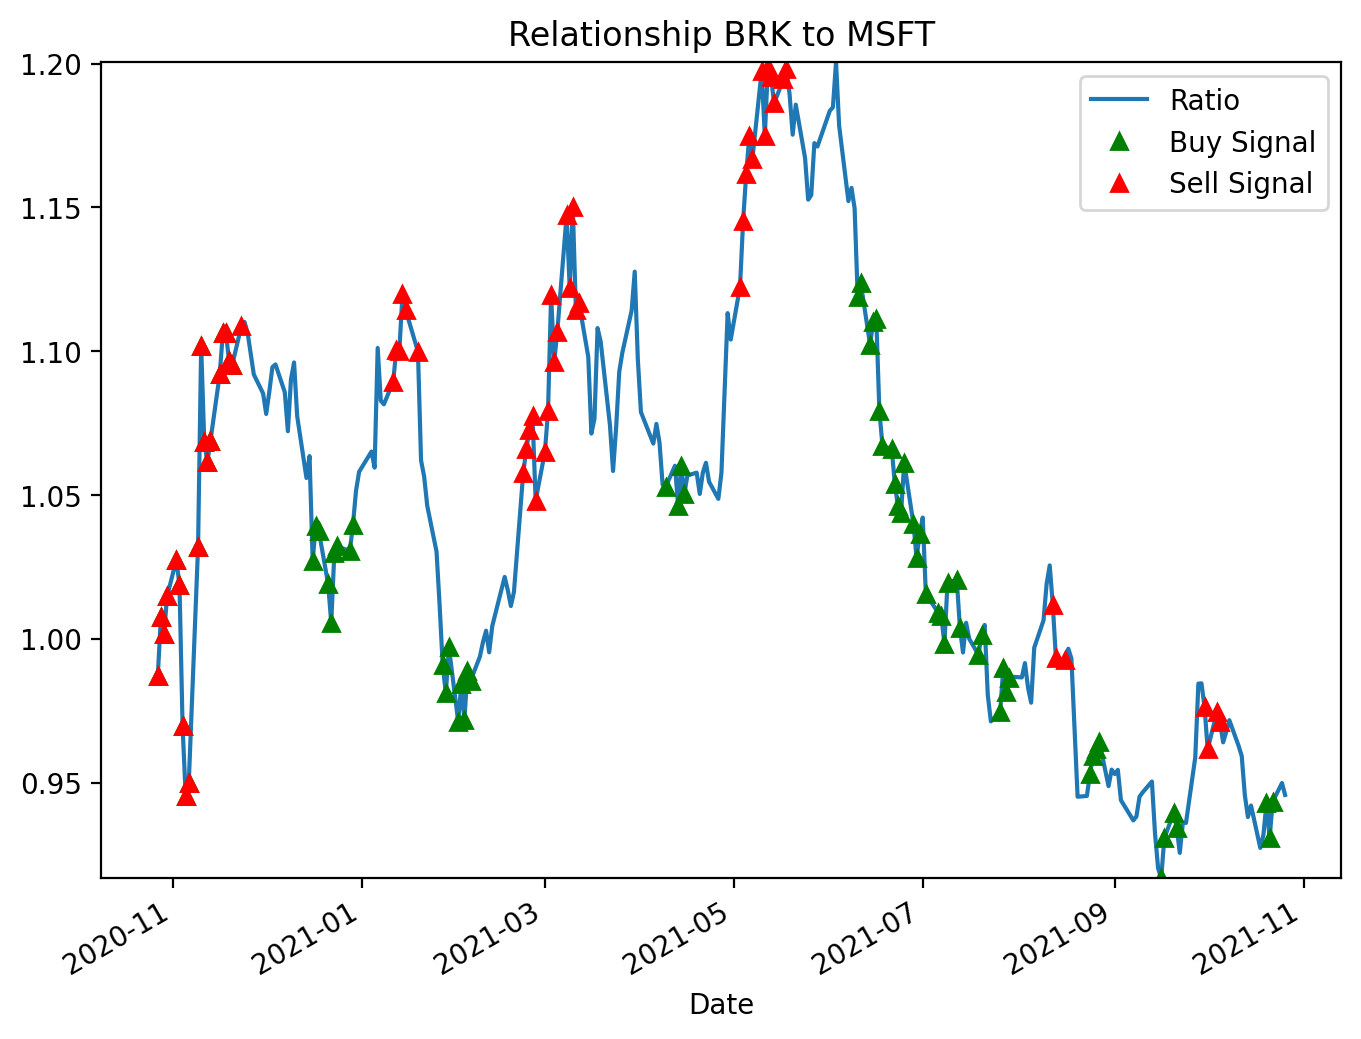

In [15]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()